#Read Module & Data

In [1]:
# Load module
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
import seaborn as sns

In [2]:
# read data
url = 'https://github.com/jane-russ/MADT8101/raw/main/4.ChurnScoring/data/ECommerce.xlsx'
df = pd.read_excel(url, sheet_name='E Comm')

In [3]:
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


#EDA

## Distinguish Attributes

In [4]:
# Understand the dataset structure
print("Number of observations:", len(df))
print("Number of variables:", len(df.columns))

Number of observations: 5630
Number of variables: 20


In [5]:
# Examine variable types
print("Variable types:")
print(df.dtypes)

Variable types:
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


In [6]:
#Seperate numerical and categorical variables
numerical_vars = df.select_dtypes(exclude=['object']).iloc[:,2:] #exclude customerid and churn
categorical_vars = df.select_dtypes(include=['object'])

In [7]:
desc = df.groupby('Churn').describe()
print("Summary statistics of numerical variables by Churn Flag:")
for col in numerical_vars:
    display(HTML(f"<h4>{col.upper()}</h4>"))
    display(desc[col].style.bar(color='lavender'))
    display(HTML('<hr/>'))

Summary statistics of numerical variables by Churn Flag:


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:4165: RuntimeWarning: invalid value encountered in double_scalars
  end = (x - left) / (right - left)


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4499.000000,11.502334,8.419217,0.000000,5.000000,10.000000,17.000000,61.000000
1,867.000000,3.379469,5.486089,0.000000,0.000000,1.000000,3.000000,21.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4682.000000,1.619821,0.902332,1.000000,1.000000,1.000000,3.000000,3.000000
1,948.000000,1.827004,0.959380,1.000000,1.000000,1.000000,3.000000,3.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4515.000000,15.353931,8.483276,5.000000,9.000000,13.000000,19.000000,127.000000
1,864.000000,17.134259,8.631132,5.000000,9.000000,15.000000,24.000000,36.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4485.000000,2.925530,0.727184,0.000000,2.000000,3.000000,3.000000,5.000000
1,890.000000,2.961798,0.694427,2.000000,2.000000,3.000000,3.000000,4.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4682.000000,3.639257,1.018910,1.000000,3.000000,4.000000,4.000000,6.000000
1,948.000000,3.934599,1.014127,1.000000,3.000000,4.000000,5.000000,6.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4682.000000,3.001282,1.378722,1.000000,2.000000,3.000000,4.000000,5.000000
1,948.000000,3.390295,1.342031,1.000000,3.000000,3.000000,5.000000,5.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4682.000000,4.162965,2.537001,1.000000,2.000000,3.000000,5.000000,22.000000
1,948.000000,4.466245,2.790071,1.000000,2.000000,3.000000,6.000000,20.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4682.000000,0.234088,0.423473,0.000000,0.000000,0.000000,0.000000,1.000000
1,948.000000,0.535865,0.498975,0.000000,0.000000,1.000000,1.000000,1.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4431.000000,15.724893,3.646256,11.000000,13.000000,15.000000,18.000000,26.000000
1,934.000000,15.627409,3.812084,11.000000,13.000000,14.000000,18.000000,26.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4434.000000,1.758232,1.893083,0.000000,1.000000,1.000000,2.000000,16.000000
1,940.000000,1.717021,1.902503,0.000000,1.000000,1.000000,2.000000,16.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4442.000000,3.046601,2.964982,1.000000,1.000000,2.000000,3.000000,16.000000
1,930.000000,2.823656,2.809924,1.000000,1.000000,2.000000,3.000000,16.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4429.000000,4.807406,3.644758,0.000000,2.000000,4.000000,8.000000,31.000000
1,894.000000,3.236018,3.415137,0.000000,1.000000,2.000000,5.000000,46.000000


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,4682.000000,180.635203,50.434791,0.000000,147.240000,166.115000,201.250000,324.990000
1,948.000000,160.370928,38.436055,110.090000,132.020000,149.660000,174.690000,323.590000


IndexError: ignored

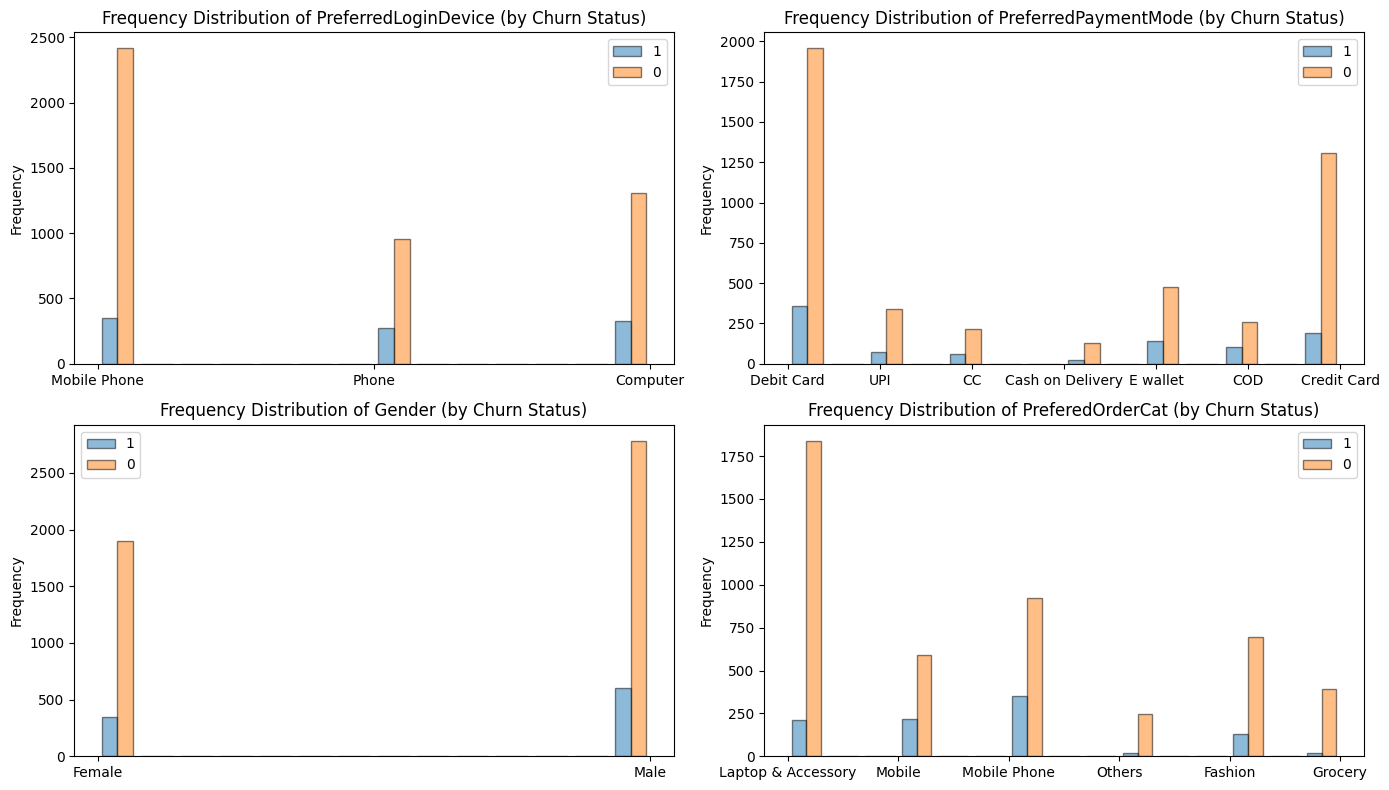

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8), tight_layout=True)
axs = axs.flatten()

# Iterate over categorical columns and create histograms
for i, col in enumerate(categorical_vars):
    ax = axs[i]
    grouped_data = df.groupby('Churn')[col]
    labels = df['Churn'].unique()
    data = [grouped_data.get_group(label).dropna() for label in labels]
    ax.hist(data, bins='auto', alpha=0.5, label=labels, edgecolor='black')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Distribution of {col} (by Churn Status)')
    ax.tick_params(axis='x', rotation=0)
    ax.legend()

plt.show()

## Univariate Analysis

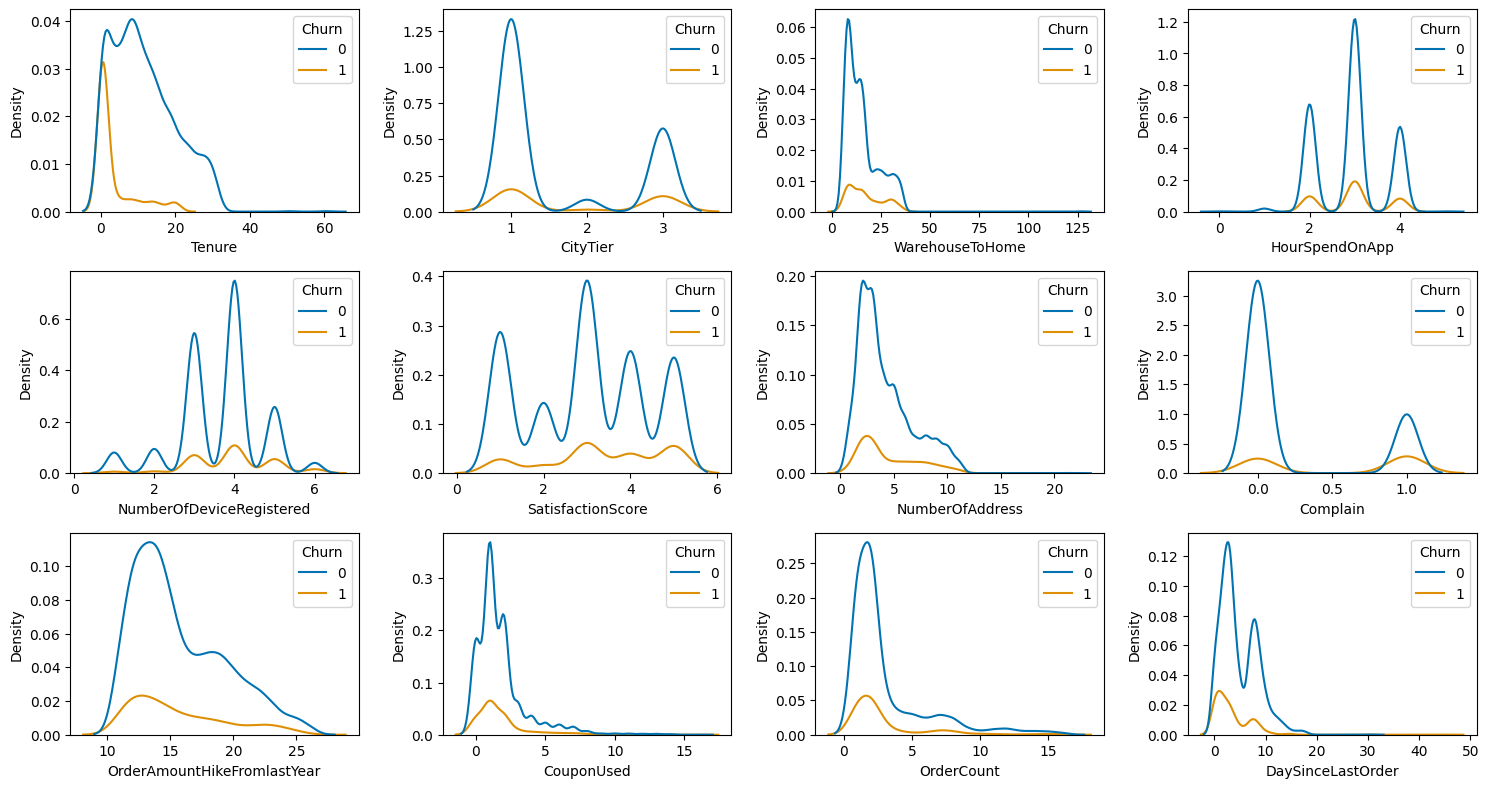

In [12]:
palette = 'colorblind'
fig, axes = plt.subplots(3,4, figsize=(15,8), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(numerical_vars, axes):
    sns.kdeplot(data=df, x=col, hue='Churn', palette=palette, ax=ax)
plt.show()

## Missing Value

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [14]:
missing_value = df.isnull().sum()
print("Missing Values:")
print(missing_value)

Missing Values:
CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [16]:
# left skew #Impute using median
columns_to_impute = ['Tenure','WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear']

# Impute columns using median
for col in columns_to_impute:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

In [27]:
#multinomial - using mode
mode_HourSpendOnApp = df['HourSpendOnApp'].mode()[0]
df['HourSpendOnApp'].fillna(mode_HourSpendOnApp, inplace=True)

In [28]:
df['HourSpendOnApp'].unique()

array([3., 2., 1., 0., 4., 5.])

## Multivariate Analysis

### Cat-Cat

<ipython-input-29-1ebef4498e81>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Churn', 'count')).reset_index().pivot(column1, 'Churn', 'no_customers')


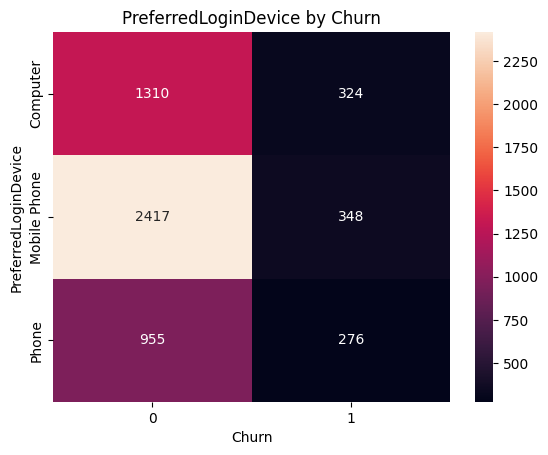

<ipython-input-29-1ebef4498e81>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Churn', 'count')).reset_index().pivot(column1, 'Churn', 'no_customers')


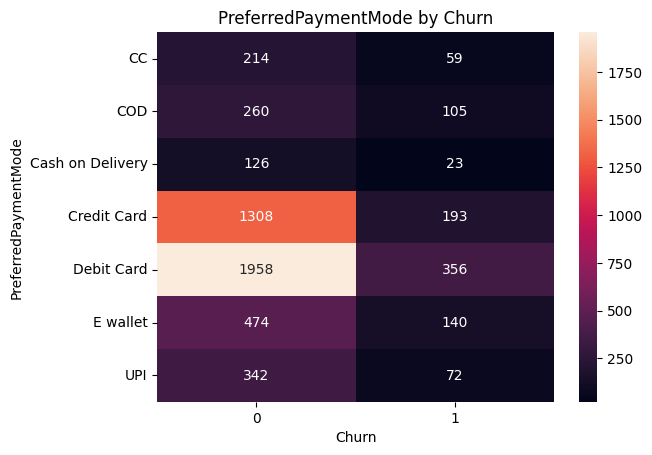

<ipython-input-29-1ebef4498e81>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Churn', 'count')).reset_index().pivot(column1, 'Churn', 'no_customers')


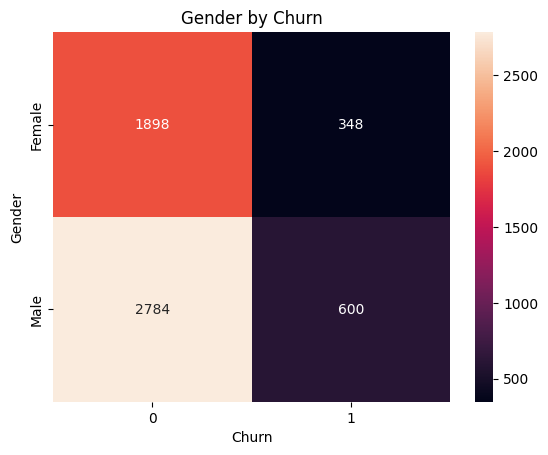

<ipython-input-29-1ebef4498e81>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Churn', 'count')).reset_index().pivot(column1, 'Churn', 'no_customers')


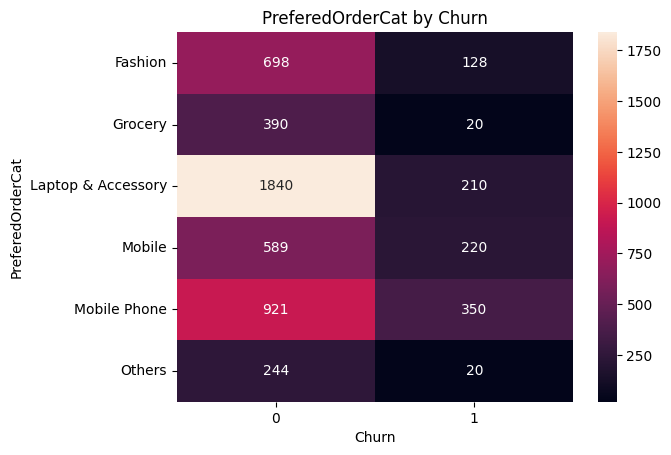

<ipython-input-29-1ebef4498e81>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  no_customers=('Churn', 'count')).reset_index().pivot(column1, 'Churn', 'no_customers')


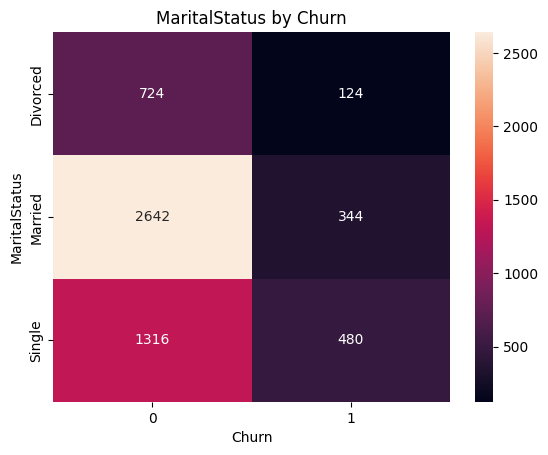

In [29]:
# Function to create a heatmap for categorical columns
def create_heatmap(dataframe, column1, column2):
    df_by_target = dataframe.groupby([column1, 'Churn']).agg(
                          no_customers=('Churn', 'count')).reset_index().pivot(column1, 'Churn', 'no_customers')

    sns.heatmap(df_by_target, annot=True, fmt='.0f')

# Iterate over the categorical columns and create heatmaps
for column in categorical_vars:
    create_heatmap(df, column, 'Churn')
    plt.title(f"{column} by Churn")
    plt.xlabel('Churn')
    plt.ylabel(column)
    plt.show()

In [30]:
from scipy.stats import chi2_contingency

chi2_results = {}

for column in categorical_vars:
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p_value': p_value}

# Print the results
for column, result in chi2_results.items():
    print(f"Chi-square test result for {column}:")
    print(f"Chi-square statistic: {result['chi2']}")
    print(f"P-value: {result['p_value']}")
    print()

Chi-square test result for PreferredLoginDevice:
Chi-square statistic: 73.53679418373687
P-value: 1.0756922373255213e-16

Chi-square test result for PreferredPaymentMode:
Chi-square statistic: 77.89682023026812
P-value: 9.708708511076305e-15

Chi-square test result for Gender:
Chi-square statistic: 4.662908495367532
P-value: 0.030820940334890086

Chi-square test result for PreferedOrderCat:
Chi-square statistic: 288.63939355672443
P-value: 2.7708325346337454e-60

Chi-square test result for MaritalStatus:
Chi-square statistic: 188.6710396770566
P-value: 1.073011277910542e-41



### Cat-Num

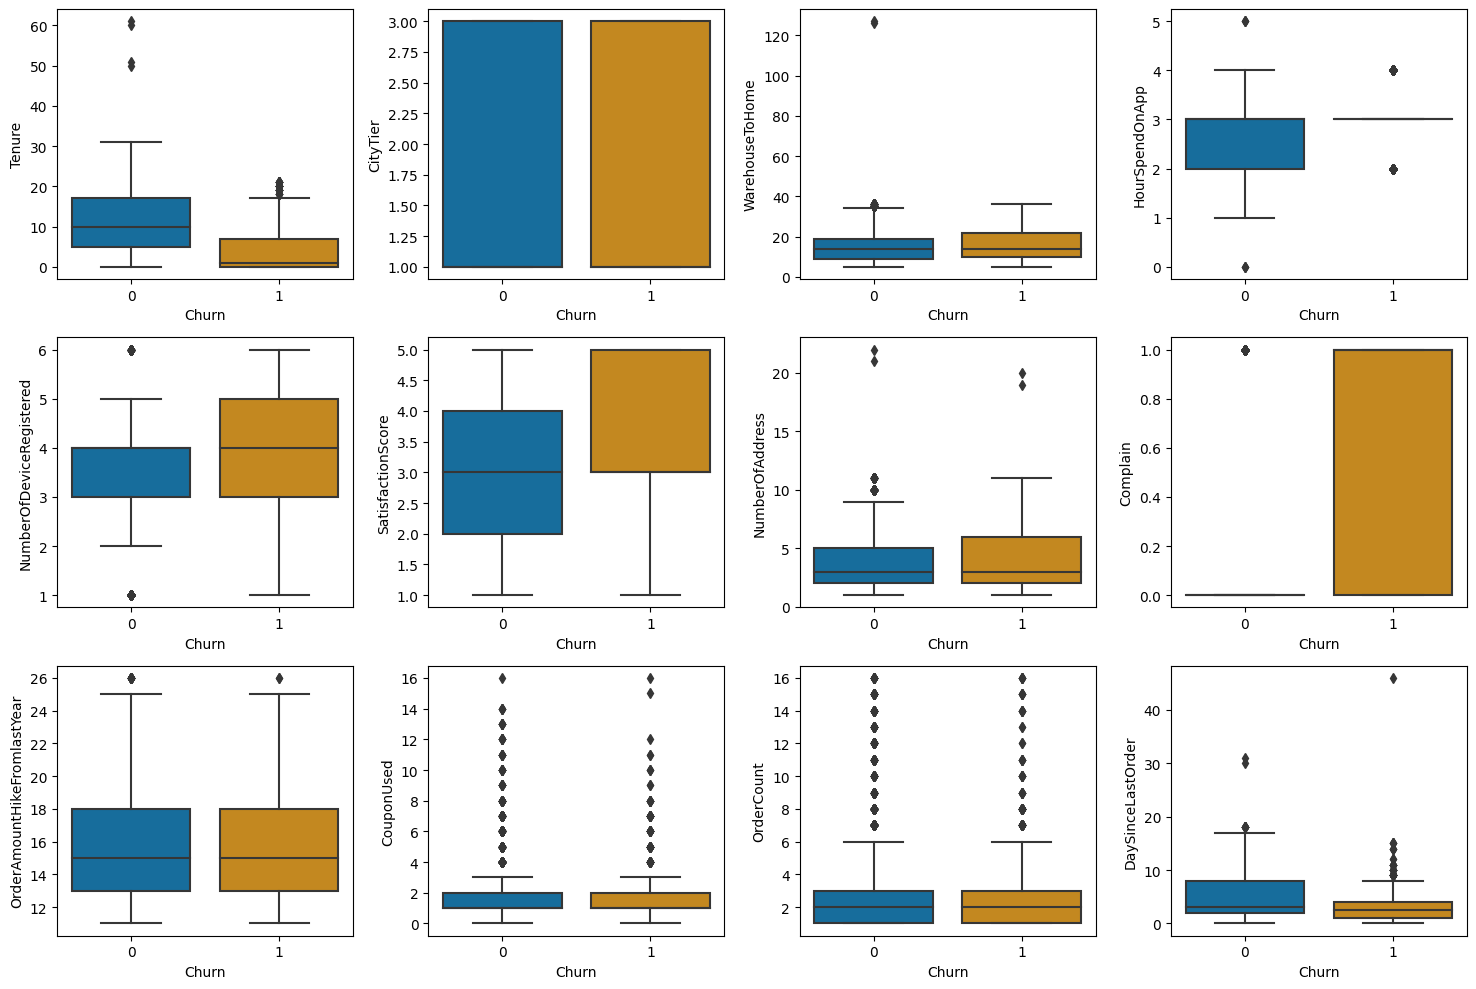

In [31]:
fig, axes = plt.subplots(3,4, figsize=(15,10), tight_layout=True)
axes = axes.ravel()
for col, ax in zip(numerical_vars, axes):
    sns.boxplot(data=df, y=col, x='Churn', palette=palette, ax=ax)
plt.show()

In [32]:
from scipy.stats import ttest_ind, f_oneway

results = []

# Perform t-test and store results
for column in numerical_vars:
    churn_yes = df[df['Churn'] == 1][column]
    churn_no = df[df['Churn'] == 0][column]
    t_statistic, p_value = ttest_ind(churn_yes, churn_no)
    results.append({'Variable': column, 'Test': 'T-Test', 'Statistic': round(t_statistic, 4), 'P-value': round(p_value, 4)})

# Perform ANOVA and store results
for column in numerical_vars:
    groups = []
    for churn_value in df['Churn'].unique():
        groups.append(df[df['Churn'] == churn_value][column])
    f_statistic, p_value = f_oneway(*groups)
    results.append({'Variable': column, 'Test': 'ANOVA', 'Statistic': round(f_statistic, 4), 'P-value': round(p_value, 4)})

# Create comparison table
comparison_table = pd.DataFrame(results)

# Print the comparison table
print(comparison_table)

                       Variable    Test  Statistic  P-value
0                        Tenure  T-Test   -26.9272   0.0000
1                      CityTier  T-Test     6.3774   0.0000
2               WarehouseToHome  T-Test     5.2298   0.0000
3                HourSpendOnApp  T-Test     1.4118   0.1581
4      NumberOfDeviceRegistered  T-Test     8.1451   0.0000
5             SatisfactionScore  T-Test     7.9576   0.0000
6               NumberOfAddress  T-Test     3.2989   0.0010
7                      Complain  T-Test    19.3856   0.0000
8   OrderAmountHikeFromlastYear  T-Test    -0.5308   0.5956
9                    CouponUsed  T-Test    -0.1073   0.9146
10                   OrderCount  T-Test    -1.8038   0.0713
11            DaySinceLastOrder  T-Test   -11.8381   0.0000
12               CashbackAmount  T-Test   -11.7018   0.0000
13                       Tenure   ANOVA   725.0743   0.0000
14                     CityTier   ANOVA    40.6706   0.0000
15              WarehouseToHome   ANOVA 

In [34]:
missing_value = df.isnull().sum()
print("Missing Values:")
print(missing_value)

Missing Values:
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


# Outlier

In [38]:
numerical_vars_impute = df.select_dtypes(exclude=['object']).iloc[:,2:] #exclude customerid and churn

In [46]:
outliers = pd.DataFrame()

for col in numerical_vars_impute:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers = pd.concat([outliers, outliers_col])

print("Outliers:")
outliers

Outliers:


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,50929,0,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.00
2719,52720,0,60.0,Mobile Phone,3,27.0,Debit Card,Female,3.0,3,Grocery,1,Married,5,1,13.0,1.0,1.0,0.0,278.75
3743,53744,0,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.00
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,15.0,1.0,2.0,1.0,303.75
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,15.0,1.0,2.0,1.0,303.75
5537,55538,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,15.0,5.0,5.0,4.0,316.61
5561,55562,0,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,15.0,2.0,2.0,5.0,321.36
5597,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,15.0,2.0,2.0,4.0,319.31


#Feature Engineer

In [47]:
for column in categorical_vars:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'PreferredLoginDevice':
['Mobile Phone' 'Phone' 'Computer']

Unique values for column 'PreferredPaymentMode':
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Unique values for column 'Gender':
['Female' 'Male']

Unique values for column 'PreferedOrderCat':
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Unique values for column 'MaritalStatus':
['Single' 'Divorced' 'Married']



In [50]:
import pandas as pd

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'], drop_first=True)

# Print the encoded DataFrame
encoded_df

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,3.0,2,1,6,0,...,0,0,1,0,1,0,0,0,1,0
5626,55627,0,13.0,1,13.0,3.0,5,5,6,0,...,0,0,1,0,0,0,0,0,1,0
5627,55628,0,1.0,1,11.0,3.0,2,4,3,1,...,0,0,1,0,1,0,0,0,1,0
5628,55629,0,23.0,3,9.0,4.0,5,4,4,0,...,0,0,1,0,1,0,0,0,1,0


In [52]:
X = encoded_df.iloc[:,2:]
y = encoded_df['Churn']

#Model Creation and Evaluation

In [62]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc

#fixing imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [67]:
class ModelEvaluator:
    def __init__(self, models,X_train, X_test, y_train, y_test):
        self.models = models
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    #Create Generic function to fit data and display results/predictions
    #clf = classifer
    def fit_evaluate(self):
        results = []

        for model_name, model in self.models.items():
          samplers = {'no_sampler':'none',
            'Under_Sampler': RandomUnderSampler(random_state=0),
            'Over_Sampler': RandomOverSampler(random_state=0),
            'SMOTE_Sampler': SMOTE(random_state=0),
          }


          for sampler_name, sampler in samplers.items():
            if sampler != 'none':
              sampler.fit(self.X_train, self.y_train)
              X_trainS, y_trainS = sampler.fit_resample(self.X_train, self.y_train)
            else:
              X_trainS = self.X_train
              y_trainS = self.y_train

            # fit model to training data
            model.fit(X_trainS, y_trainS)

            # make predictions for train data
            y_pred_train = model.predict(X_trainS)

            # make predictions for test data
            y_pred_test = model.predict(self.X_test)
            # print evaluation
            print(classification_report(self.y_test, y_pred_test))

            # Calculate F1 score
            f1 = f1_score(self.y_test, y_pred_test)
            precision = precision_score(self.y_test, y_pred_test)
            recall = recall_score(self.y_test, y_pred_test)

            results.append({'Model': model_name, 'Sampler': sampler_name, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
            print(f'Model: {model_name}, Sampler: {sampler_name}')
            print('\nConfusion Matrix: \n')
            s = sns.heatmap(confusion_matrix(self.y_test, y_pred_test), annot=True, fmt='g', cmap='YlGnBu');
            s.set(xlabel='Predicted class', ylabel='True class')
            plt.show()

            fpr_train, tpr_train, _ = roc_curve(y_pred_train,  y_trainS)
            auc_train = roc_auc_score(y_pred_train, y_trainS)
            plt.plot(fpr_train,tpr_train, color='Blue', label='train: auc='+f'{auc_train:.2f}')
            fpr_test, tpr_test, _ = roc_curve(y_pred_test,  self.y_test)
            auc_test = roc_auc_score(y_pred_test, self.y_test)
            plt.plot(fpr_test,tpr_test, color='Red', label='test: auc='+f'{auc_test:.2f}')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.legend(loc=4)
            plt.show()
        return pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1885
           1       0.74      0.50      0.60       367

    accuracy                           0.89      2252
   macro avg       0.83      0.73      0.77      2252
weighted avg       0.88      0.89      0.88      2252

Model: Logistic Regression, Sampler: no_sampler

Confusion Matrix: 



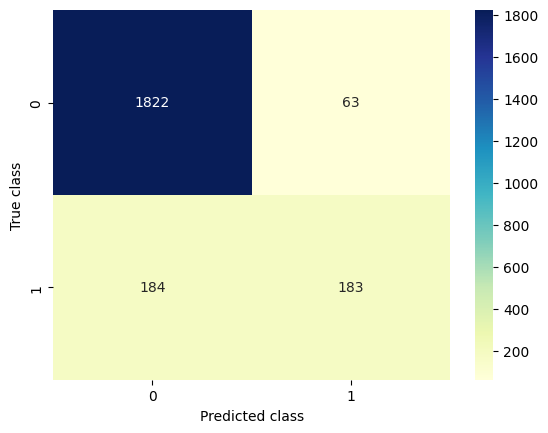

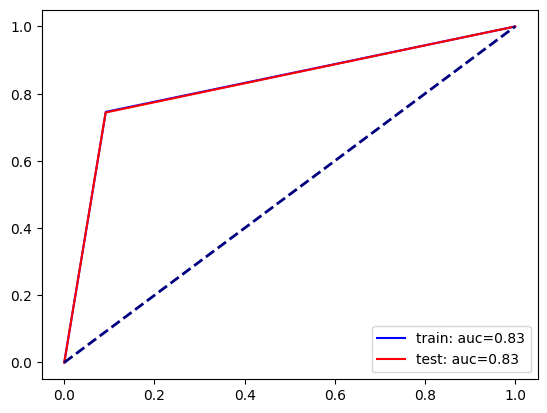

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1885
           1       0.43      0.82      0.57       367

    accuracy                           0.80      2252
   macro avg       0.70      0.81      0.72      2252
weighted avg       0.87      0.80      0.82      2252

Model: Logistic Regression, Sampler: Under_Sampler

Confusion Matrix: 



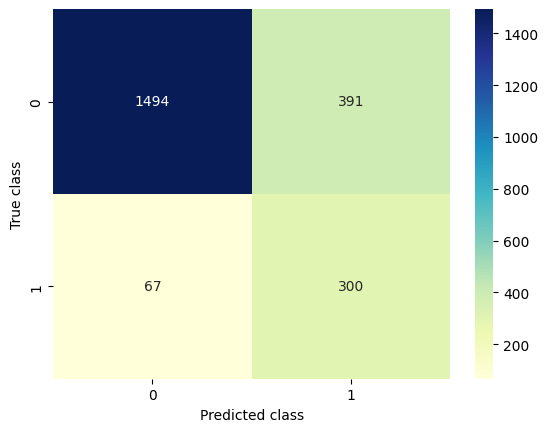

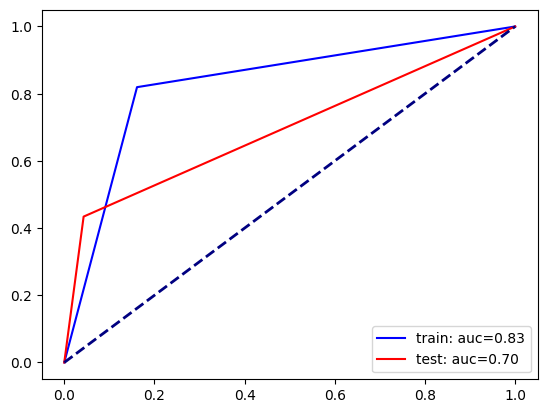

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1885
           1       0.44      0.80      0.57       367

    accuracy                           0.80      2252
   macro avg       0.70      0.80      0.72      2252
weighted avg       0.87      0.80      0.82      2252

Model: Logistic Regression, Sampler: Over_Sampler

Confusion Matrix: 



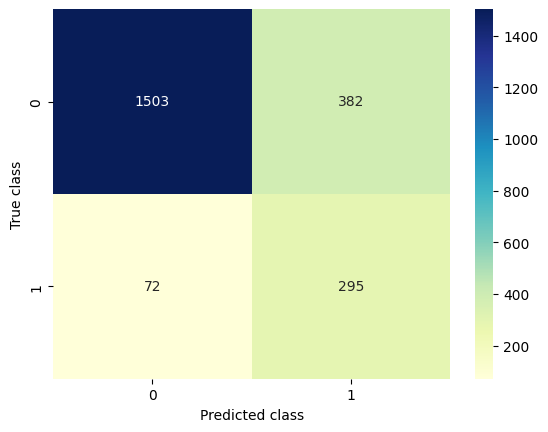

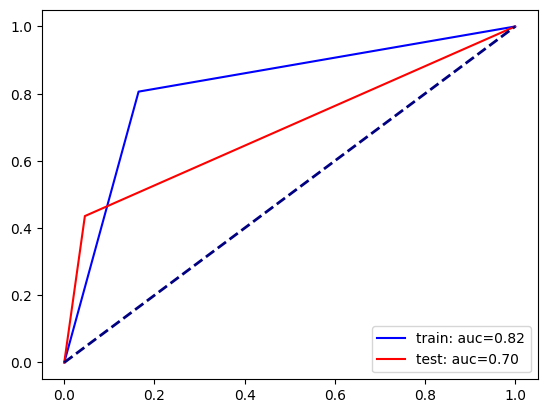

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1885
           1       0.45      0.72      0.55       367

    accuracy                           0.81      2252
   macro avg       0.69      0.77      0.71      2252
weighted avg       0.86      0.81      0.83      2252

Model: Logistic Regression, Sampler: SMOTE_Sampler

Confusion Matrix: 



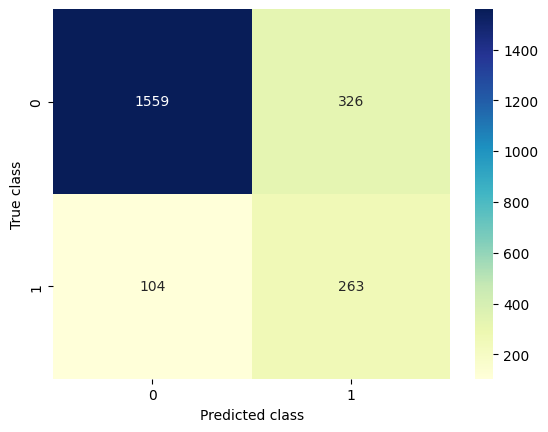

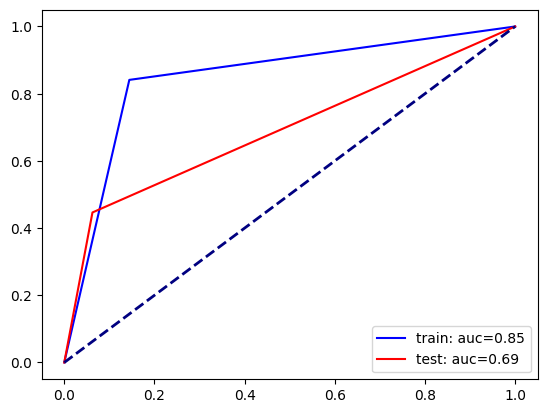

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1885
           1       0.92      0.72      0.81       367

    accuracy                           0.94      2252
   macro avg       0.93      0.86      0.89      2252
weighted avg       0.94      0.94      0.94      2252

Model: Random Forest, Sampler: no_sampler

Confusion Matrix: 



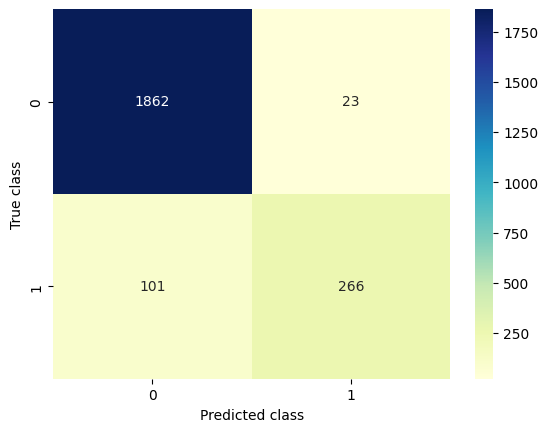

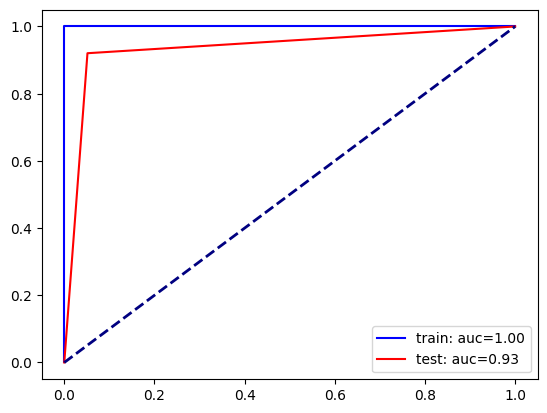

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1885
           1       0.62      0.91      0.74       367

    accuracy                           0.89      2252
   macro avg       0.80      0.90      0.83      2252
weighted avg       0.92      0.89      0.90      2252

Model: Random Forest, Sampler: Under_Sampler

Confusion Matrix: 



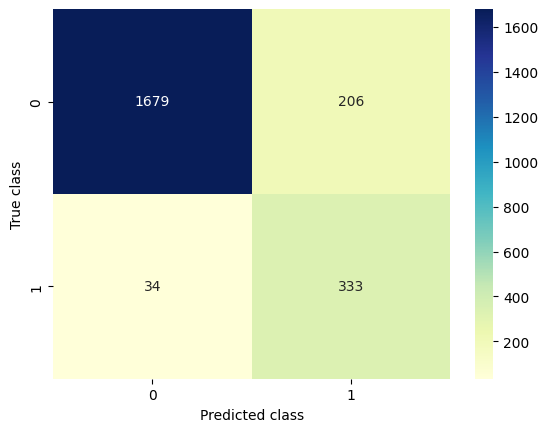

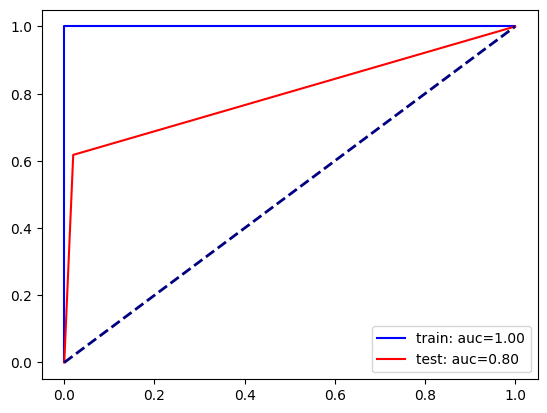

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1885
           1       0.92      0.80      0.86       367

    accuracy                           0.96      2252
   macro avg       0.94      0.90      0.92      2252
weighted avg       0.96      0.96      0.96      2252

Model: Random Forest, Sampler: Over_Sampler

Confusion Matrix: 



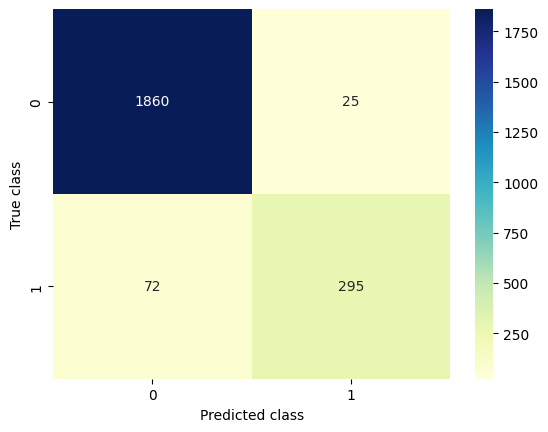

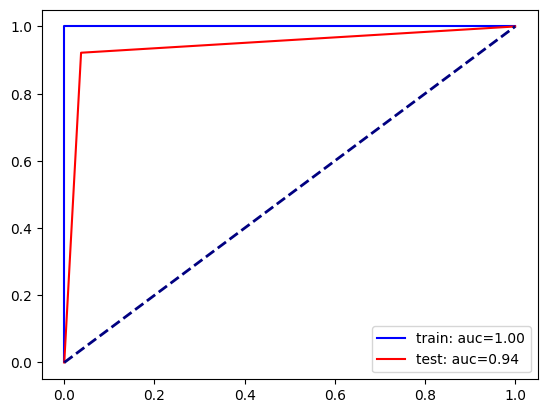

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1885
           1       0.86      0.73      0.79       367

    accuracy                           0.94      2252
   macro avg       0.90      0.85      0.88      2252
weighted avg       0.93      0.94      0.93      2252

Model: Random Forest, Sampler: SMOTE_Sampler

Confusion Matrix: 



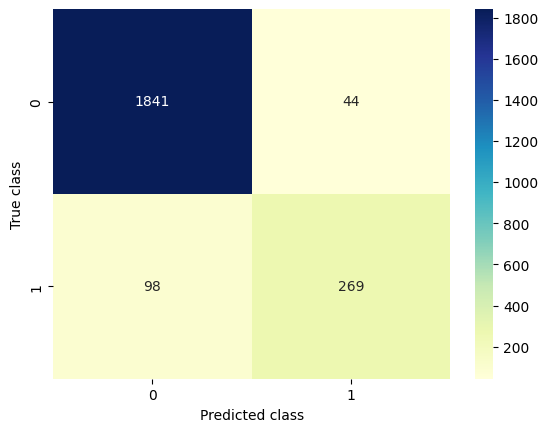

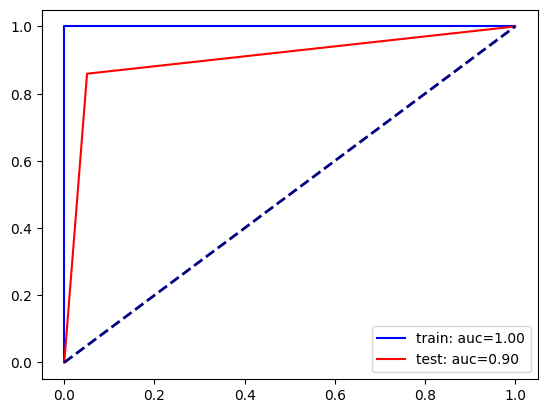

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1885
           1       0.59      0.35      0.44       367

    accuracy                           0.85      2252
   macro avg       0.74      0.65      0.68      2252
weighted avg       0.83      0.85      0.84      2252

Model: KNeighbors, Sampler: no_sampler

Confusion Matrix: 



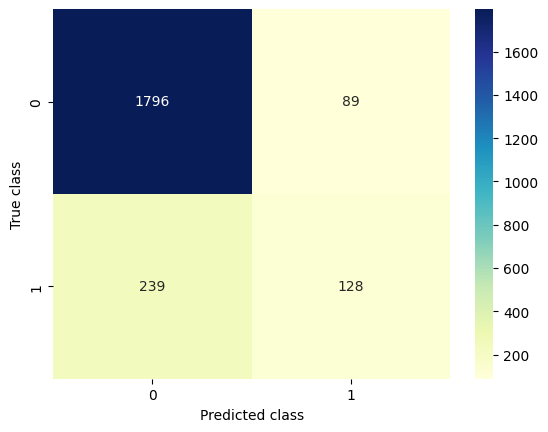

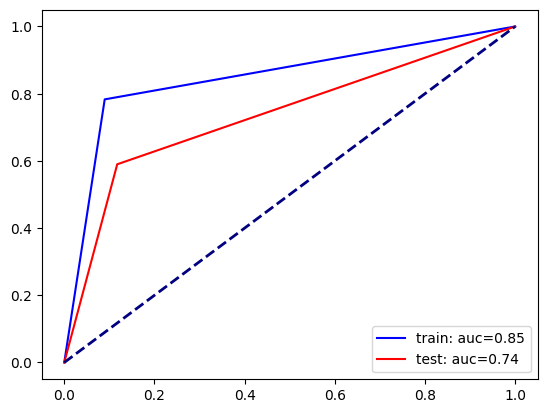

              precision    recall  f1-score   support

           0       0.93      0.73      0.81      1885
           1       0.34      0.71      0.46       367

    accuracy                           0.72      2252
   macro avg       0.63      0.72      0.64      2252
weighted avg       0.83      0.72      0.76      2252

Model: KNeighbors, Sampler: Under_Sampler

Confusion Matrix: 



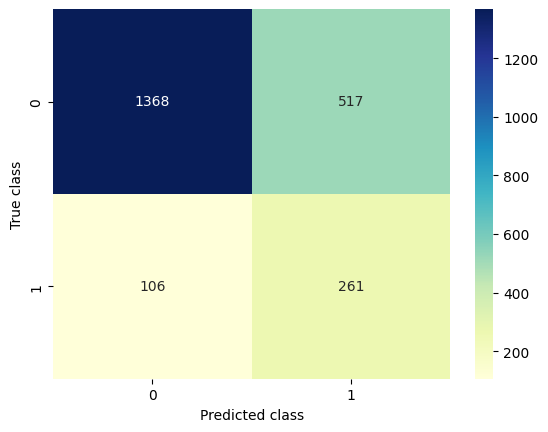

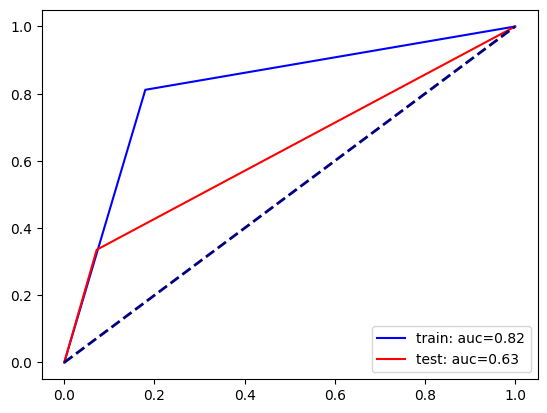

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1885
           1       0.45      0.77      0.57       367

    accuracy                           0.81      2252
   macro avg       0.70      0.79      0.72      2252
weighted avg       0.87      0.81      0.83      2252

Model: KNeighbors, Sampler: Over_Sampler

Confusion Matrix: 



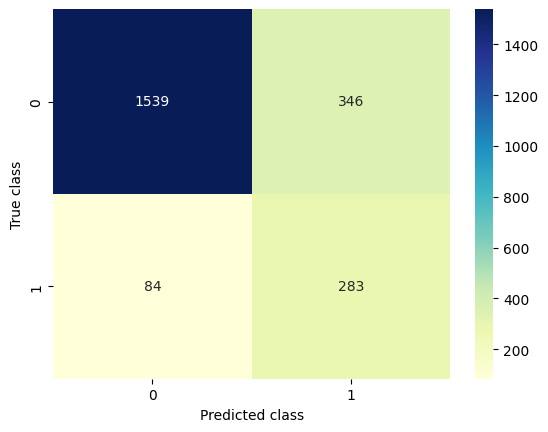

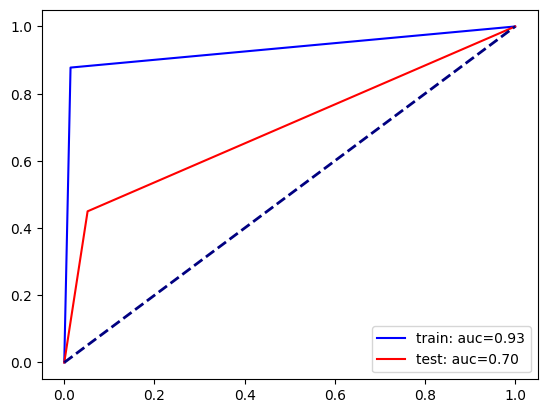

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1885
           1       0.43      0.81      0.57       367

    accuracy                           0.80      2252
   macro avg       0.70      0.80      0.72      2252
weighted avg       0.87      0.80      0.82      2252

Model: KNeighbors, Sampler: SMOTE_Sampler

Confusion Matrix: 



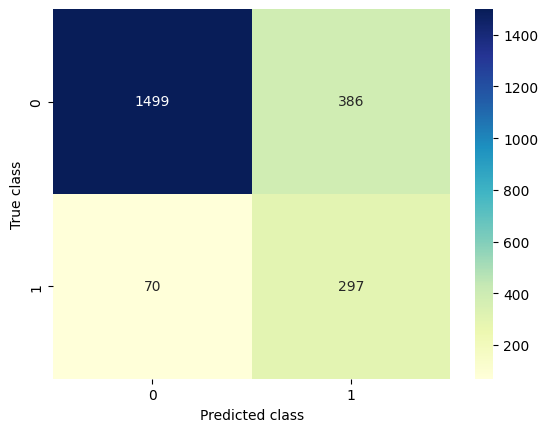

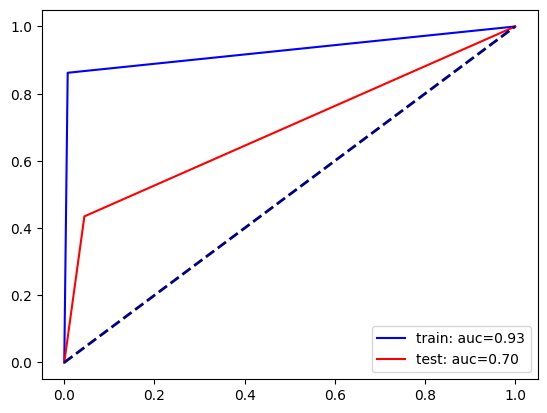

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1885
           1       0.91      0.81      0.86       367

    accuracy                           0.96      2252
   macro avg       0.94      0.90      0.92      2252
weighted avg       0.96      0.96      0.96      2252

Model: XGBoost, Sampler: no_sampler

Confusion Matrix: 



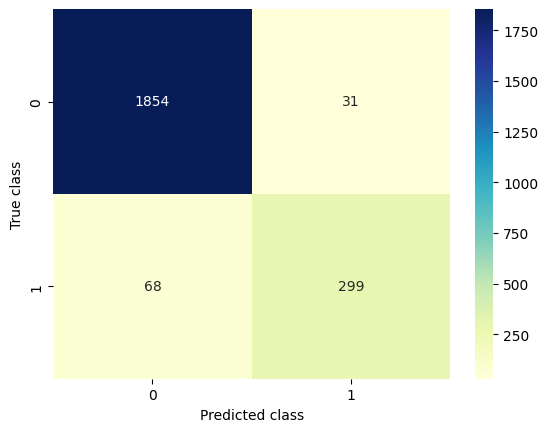

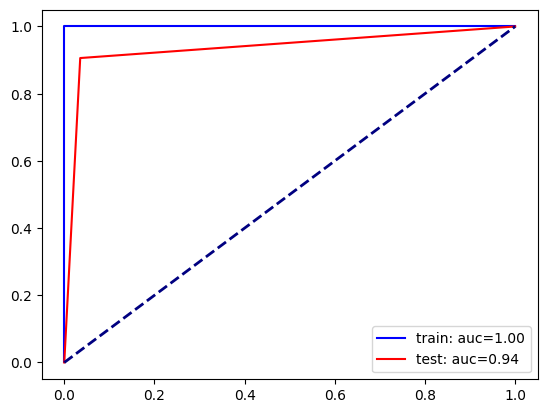

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1885
           1       0.61      0.90      0.73       367

    accuracy                           0.89      2252
   macro avg       0.80      0.89      0.83      2252
weighted avg       0.92      0.89      0.90      2252

Model: XGBoost, Sampler: Under_Sampler

Confusion Matrix: 



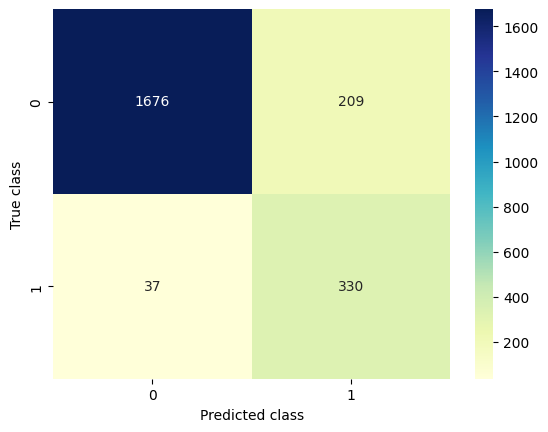

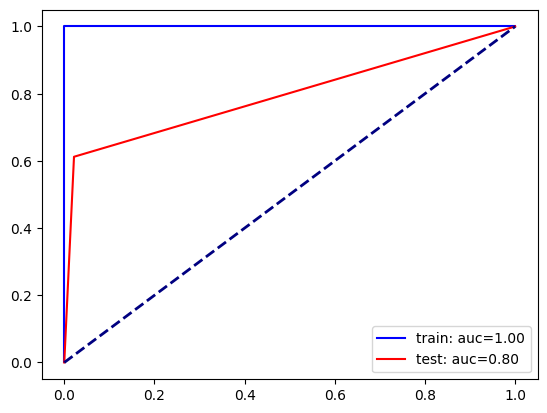

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1885
           1       0.90      0.84      0.87       367

    accuracy                           0.96      2252
   macro avg       0.93      0.91      0.92      2252
weighted avg       0.96      0.96      0.96      2252

Model: XGBoost, Sampler: Over_Sampler

Confusion Matrix: 



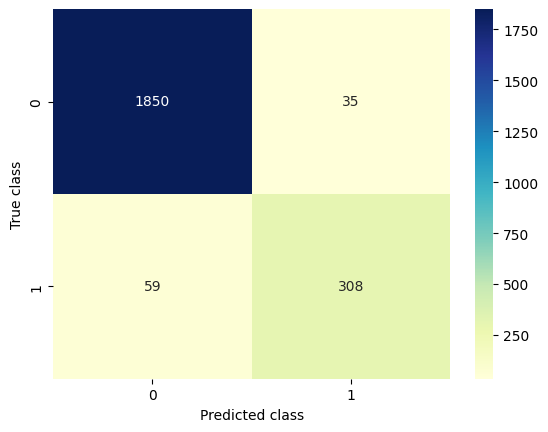

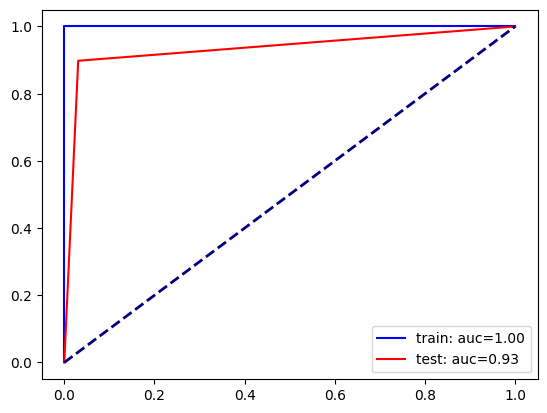

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1885
           1       0.87      0.79      0.83       367

    accuracy                           0.95      2252
   macro avg       0.92      0.89      0.90      2252
weighted avg       0.95      0.95      0.95      2252

Model: XGBoost, Sampler: SMOTE_Sampler

Confusion Matrix: 



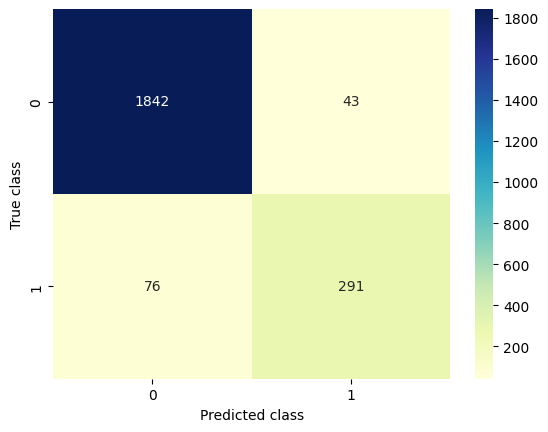

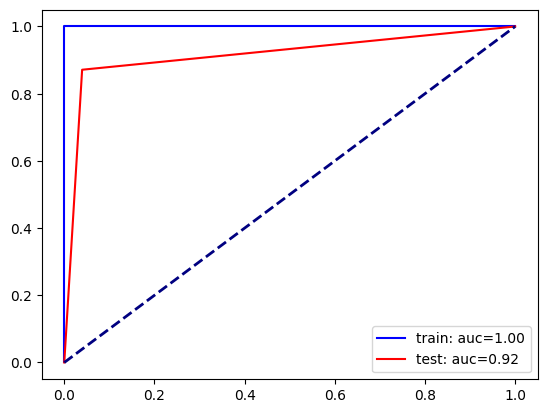

                  Model        Sampler  Precision    Recall  F1 Score
0   Logistic Regression     no_sampler   0.743902  0.498638  0.597064
1   Logistic Regression  Under_Sampler   0.434153  0.817439  0.567108
2   Logistic Regression   Over_Sampler   0.435746  0.803815  0.565134
3   Logistic Regression  SMOTE_Sampler   0.446520  0.716621  0.550209
4         Random Forest     no_sampler   0.920415  0.724796  0.810976
5         Random Forest  Under_Sampler   0.617811  0.907357  0.735099
6         Random Forest   Over_Sampler   0.921875  0.803815  0.858806
7         Random Forest  SMOTE_Sampler   0.859425  0.732970  0.791176
8            KNeighbors     no_sampler   0.589862  0.348774  0.438356
9            KNeighbors  Under_Sampler   0.335476  0.711172  0.455895
10           KNeighbors   Over_Sampler   0.449921  0.771117  0.568273
11           KNeighbors  SMOTE_Sampler   0.434846  0.809264  0.565714
12              XGBoost     no_sampler   0.906061  0.814714  0.857963
13              XGBo

In [68]:
# Specify the models you want to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}
evaluator = ModelEvaluator(models,X_train, X_test, y_train, y_test)
results = evaluator.fit_evaluate()
print(results)


#Result

##Merge Result

In [95]:
# Instantiate the XGBoost model
model = xgb.XGBClassifier()

# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=0)
X_train_oversampler, y_train_oversampler = oversampler.fit_resample(X_train, y_train)

# Fit the model to the resampled training data
model.fit(X_train_oversampler, y_train_oversampler)

# Make predictions for the train data
y_pred_train = model.predict(X_train)

# Make predictions for the test data
y_pred_test = model.predict(X_test)

# Create new columns in the original DataFrame df to store the predictions
df.loc[X_train.index, 'Prediction_train'] = y_pred_train
df.loc[X_test.index, 'Prediction_test'] = y_pred_test

In [96]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Prediction_train,Prediction_test
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,1.0,NaN
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,1.0,NaN
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,1.0,NaN
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,1.0,NaN
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,Married,6,0,18.0,1.0,2.0,4.0,150.71,NaN,0.0
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,Married,6,0,16.0,1.0,2.0,3.0,224.91,0.0,NaN
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,Married,3,1,21.0,1.0,2.0,4.0,186.42,0.0,NaN
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,Married,4,0,15.0,2.0,2.0,9.0,178.90,0.0,NaN


## Feature Importance

In [98]:
# Get the feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display the feature importance
importance_df = pd.DataFrame({'Feature': X_train_oversampler.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(importance_df)

Feature Importance:
                                  Feature  Importance
0                                  Tenure    0.140103
16  PreferredPaymentMode_Cash on Delivery    0.085776
7                                Complain    0.082894
1                                CityTier    0.041907
23    PreferedOrderCat_Laptop & Accessory    0.041244
6                         NumberOfAddress    0.039498
11                      DaySinceLastOrder    0.034307
19          PreferredPaymentMode_E wallet    0.034264
28                   MaritalStatus_Single    0.034215
15               PreferredPaymentMode_COD    0.032237
17       PreferredPaymentMode_Credit Card    0.031296
10                             OrderCount    0.031043
26                PreferedOrderCat_Others    0.029562
5                       SatisfactionScore    0.028308
12                         CashbackAmount    0.026754
27                  MaritalStatus_Married    0.026380
20               PreferredPaymentMode_UPI    0.025858
9       

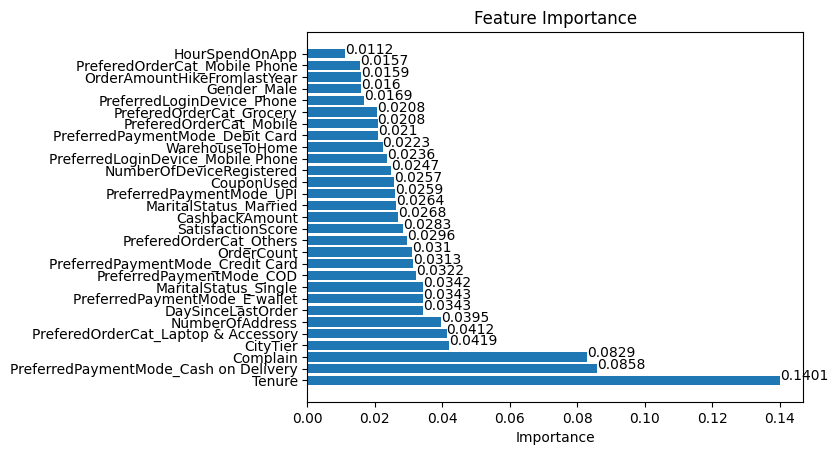

In [99]:
# Create a horizontal bar plot
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')

# Add value annotations to the end of each bar
for i, v in enumerate(importance_df['Importance']):
    plt.text(v, i, str(round(v, 4)), color='black')

# Show the plot
plt.show()